In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

# Display the data
print(df)

                   date                                    profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
3      12/31/23 7:00 PM                           disneyland paris   
4      12/31/23 7:00 PM                      silverwood theme park   
...                 ...                                        ...   
15438  01/01/2023 02:00                 wild adventures theme park   
15439  01/01/2023 01:20                                   playland   
15440  01/01/2023 00:01                           disneyland paris   
15441  01/01/2023 00:00  six flags over georgia & hurricane harbor   
15442  01/01/2023 00:00                         knott's berry farm   

                                                 message  nr_reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1      See 

In [3]:
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)

                               Variable Name  Null Values
date                                    date            0
profile                              profile            0
message                              message            0
nr_reactions                    nr_reactions            0
nr_comments                      nr_comments            0
nr_shares                          nr_shares            0
comments/post                  comments/post            0
post_interaction_rate  post_interaction_rate        12384
engagement                        engagement            0
nr_likes                            nr_likes            0
link_posts                        link_posts        14888
picture_posts                  picture_posts         3881
video_posts                      video_posts        12964
profile_id                        profile_id            0
post_id                              post_id            0
link                                    link            0
followers     

In [4]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(message):
    blob = TextBlob(message)
    return blob.sentiment.polarity

# Apply sentiment analysis to the message column
df['sentiment'] = df['message'].apply(get_sentiment)

# Display the updated DataFrame
print(df)

                   date                                    profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
3      12/31/23 7:00 PM                           disneyland paris   
4      12/31/23 7:00 PM                      silverwood theme park   
...                 ...                                        ...   
15438  01/01/2023 02:00                 wild adventures theme park   
15439  01/01/2023 01:20                                   playland   
15440  01/01/2023 00:01                           disneyland paris   
15441  01/01/2023 00:00  six flags over georgia & hurricane harbor   
15442  01/01/2023 00:00                         knott's berry farm   

                                                 message  nr_reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1      See 

In [5]:
column_names = df.columns
print(column_names)

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'engagement',
       'nr_likes', 'link_posts', 'picture_posts', 'video_posts', 'profile_id',
       'post_id', 'link', 'followers', 'weighted_engagement', 'sentiment'],
      dtype='object')


In [6]:
df[['message', 'sentiment', 'engagement']]

,message,sentiment,engagement
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,0.317857,1.090000e+12
1,See you next year! 😉 Don’t miss...,0.200000,4.170000e+11
2,Don't miss our HUGE firework display ! 🥳\n\n#f...,0.500000,2.850000e+11
3,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,0.000000,1.360000e+11
4,It's the last day of our New Year's Sale! Save...,0.129545,4.960000e+11
...,...,...,...
15438,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,0.304167,1.250000e+11
15439,O Grupo Playcenter e os Parques Playcenter Fam...,0.000000,2.460000e+09
15440,Gelukkig 2023! Laat de magie dit jaar stralen ...,0.000000,1.750000e+12
15441,What are your 2023 New Years resolutions? ✨\n\...,0.443182,1.420000e+12


In [7]:
column_dtypes = df.dtypes
print(column_dtypes)

date                      object
profile                   object
message                   object
nr_reactions               int64
nr_comments                int64
nr_shares                  int64
comments/post              int64
post_interaction_rate    float64
engagement               float64
nr_likes                   int64
link_posts               float64
picture_posts            float64
video_posts              float64
profile_id                object
post_id                   object
link                      object
followers                  int64
weighted_engagement        int64
sentiment                float64
dtype: object


In [8]:
negative_sentiments = df[df['sentiment'] < 0]
if not negative_sentiments.empty:
    print("There are negative values in the sentiment column.")
else:
    print("There are no negative values in the sentiment column.")

There are negative values in the sentiment column.


In [9]:
negative_count = negative_sentiments[negative_sentiments['sentiment'] < 0]['sentiment'].count()
print(negative_count)

872


In [10]:
negative_messages = negative_sentiments['message']
print(negative_messages)


44       A round of applause to TKO Valdosta Nissan and...
57       🎁 Let the gift-giving continue! Get unlimited ...
70       Due to the inclement weather, Gilroy Gardens w...
97       Experience the all-new #TopThrill2 next season...
107      Due to the high surf advisory and evacuations ...
                               ...                        
15303    PLAYLAND CENTER NORTE\n\nAlô, alô #ZonaNorte d...
15324    Warning: watching this will give you serious F...
15338    SAVE THE DATE for our Fire & Ice Festival on S...
15360    Due to inclement weather, we will close the pa...
15415    That moment you come face to fang on Cobra's C...
Name: message, Length: 872, dtype: object


In [11]:
import nltk
nltk.download('punkt')
nltk.download('brown')

[nltk_data] Downloading package punkt to /Users/carlhumbs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /Users/carlhumbs/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [12]:
from collections import Counter

# Filter the negative sentiment messages
negative_messages = df[df['sentiment'] < 0]['message']

# Create a list to store all words and phrases
all_words = []
all_phrases = []

# Iterate over each negative message
for message in negative_messages:
    # Create a TextBlob object for the message
    blob = TextBlob(message)
    
    # Tokenize the message into words and phrases
    words = blob.words
    phrases = blob.noun_phrases
    
    # Add the words and phrases to the list
    all_words.extend(words)
    all_phrases.extend(phrases)

# Count the frequencies of words and phrases
word_frequencies = Counter(all_words)
phrase_frequencies = Counter(all_phrases)

# Display the word frequencies
print("Word Frequencies:")
for word, frequency in word_frequencies.most_common():
    print(f"{word}: {frequency}")

# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")

Word Frequencies:
the: 964
to: 721
and: 600
a: 469
of: 433
for: 433
you: 358
at: 356
in: 304
on: 278
our: 266
is: 237
will: 232
's: 231
’: 225
be: 220
your: 218
with: 194
https: 188
this: 180
The: 145
We: 145
are: 141
today: 131
we: 127
park: 120
all: 114
from: 110
us: 108
as: 107
s: 103
it: 100
tickets: 100
up: 97
day: 93
or: 90
weather: 88
now: 85
that: 82
can: 82
open: 80
n't: 77
out: 76
weekend: 76
down: 75
Friday: 72
closed: 69
through: 68
get: 68
have: 67
by: 66
Sunday: 64
only: 64
time: 62
Due: 61
Saturday: 61
before: 61
Pass: 59
Park: 58
inclement: 56
Disney: 55
Get: 54
2023: 54
into: 54
here: 54
season: 52
no: 51
Season: 51
do: 50
an: 49
see: 48
one: 48
ride: 46
Day: 46
little: 45
Do: 45
any: 45
tomorrow: 43
It: 42
Join: 42
Halloween: 42
Knott: 42
visit: 41
just: 41
Our: 41
long: 40
next: 39
when: 39
t: 39
Tickets: 38
during: 38
like: 38
Fest: 38
de: 38
not: 37
rides: 36
re: 36
This: 36
limited: 36
e: 36
're: 35
miss: 35
Farm: 35
A: 34
save: 34
has: 34
purchase: 34
event: 34
O

In [13]:
from collections import Counter

# Filter the positive sentiment messages
positive_messages = df[df['sentiment'] > 0]['message']

# Create a list to store all words and phrases
all_words = []
all_phrases = []

# Iterate over each positive message
for message in negative_messages:
    # Create a TextBlob object for the message
    blob = TextBlob(message)
    
    # Tokenize the message into words and phrases
    words = blob.words
    phrases = blob.noun_phrases
    
    # Add the words and phrases to the list
    all_words.extend(words)
    all_phrases.extend(phrases)

# Count the frequencies of words and phrases
word_frequencies = Counter(all_words)
phrase_frequencies = Counter(all_phrases)

# Display the word frequencies
print("Word Frequencies:")
for word, frequency in word_frequencies.most_common():
    print(f"{word}: {frequency}")

# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")

Word Frequencies:
the: 964
to: 721
and: 600
a: 469
of: 433
for: 433
you: 358
at: 356
in: 304
on: 278
our: 266
is: 237
will: 232
's: 231
’: 225
be: 220
your: 218
with: 194
https: 188
this: 180
The: 145
We: 145
are: 141
today: 131
we: 127
park: 120
all: 114
from: 110
us: 108
as: 107
s: 103
it: 100
tickets: 100
up: 97
day: 93
or: 90
weather: 88
now: 85
that: 82
can: 82
open: 80
n't: 77
out: 76
weekend: 76
down: 75
Friday: 72
closed: 69
through: 68
get: 68
have: 67
by: 66
Sunday: 64
only: 64
time: 62
Due: 61
Saturday: 61
before: 61
Pass: 59
Park: 58
inclement: 56
Disney: 55
Get: 54
2023: 54
into: 54
here: 54
season: 52
no: 51
Season: 51
do: 50
an: 49
see: 48
one: 48
ride: 46
Day: 46
little: 45
Do: 45
any: 45
tomorrow: 43
It: 42
Join: 42
Halloween: 42
Knott: 42
visit: 41
just: 41
Our: 41
long: 40
next: 39
when: 39
t: 39
Tickets: 38
during: 38
like: 38
Fest: 38
de: 38
not: 37
rides: 36
re: 36
This: 36
limited: 36
e: 36
're: 35
miss: 35
Farm: 35
A: 34
save: 34
has: 34
purchase: 34
event: 34
O

In [14]:
# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")


Phrase Frequencies:
’ s: 71
inclement weather: 56
join: 39
tickets: 37
knott: 37
october: 32
june: 32
’ re: 30
december: 28
grab: 28
april: 28
september: 27
disney: 26
’ t: 25
have: 24
january: 23
scary: 23
mysixflags: 22
pm: 21
flags: 19
kingsisland: 19
black: 19
frightfest: 19
season pass: 18
fright fest: 18
hurry: 17
don: 17
quassy: 17
may: 17
buy: 16
august: 16
disney+: 15
belmont: 15
november: 15
halloween: 15
please: 14
hersheypark: 14
sale: 14
halloween haunt: 14
july: 14
thank: 13
’ ll: 13
georgia: 13
's #: 13
diversao: 13
march: 13
playland: 12
oct.: 12
disneyland: 12
pass: 11
cedar: 11
arcade: 11
season passes: 11
phantom: 11
berry: 11
soak: 11
waterpark: 11
head: 10
haunted: 10
who: 10
save: 10
click: 10
dive: 10
attention: 10
fest: 10
california: 10
comment: 10
knottsberryfarm: 10
gilroy gardens: 9
boardwalk: 9
dec: 9
compounce: 9
offer: 9
ca n't: 9
oktoberfest: 9
nights: 9
new: 9
san diego: 9
sixflagsmemories: 9
select california marketplace: 9
buy now: 8
holiday: 8
’ ve:

In [15]:
# Check for null values in each DataFrame
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)

                               Variable Name  Null Values
date                                    date            0
profile                              profile            0
message                              message            0
nr_reactions                    nr_reactions            0
nr_comments                      nr_comments            0
nr_shares                          nr_shares            0
comments/post                  comments/post            0
post_interaction_rate  post_interaction_rate        12384
engagement                        engagement            0
nr_likes                            nr_likes            0
link_posts                        link_posts        14888
picture_posts                  picture_posts         3881
video_posts                      video_posts        12964
profile_id                        profile_id            0
post_id                              post_id            0
link                                    link            0
followers     

In [16]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(df['sentiment'], df['engagement'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.03349423097831325
P-value: 3.138804980700575e-05


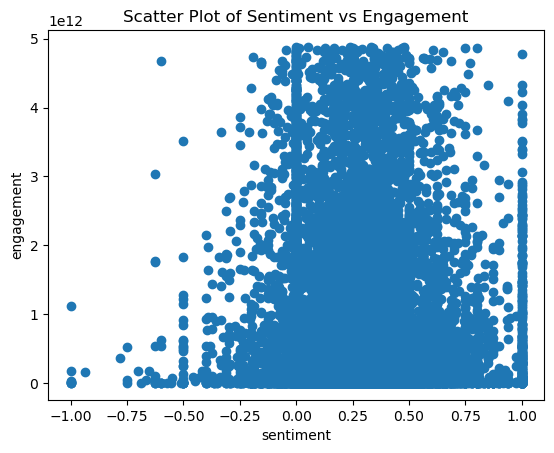

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['sentiment'], df['engagement'])
plt.xlabel('sentiment')
plt.ylabel('engagement')
plt.title('Scatter Plot of Sentiment vs Engagement')
plt.show()

In [18]:
from scipy.stats import kruskal

# Filter the DataFrame for each sentiment category
neutral_engagement = df[df['sentiment'] == 0]['engagement']
positive_engagement = df[df['sentiment'] > 0]['engagement']
negative_engagement = df[df['sentiment'] < 0]['engagement']

# Run the Kruskal-Wallis test
statistic, p_value = kruskal(neutral_engagement, positive_engagement, negative_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 27.944689959293544
P-value: 8.548455909947135e-07


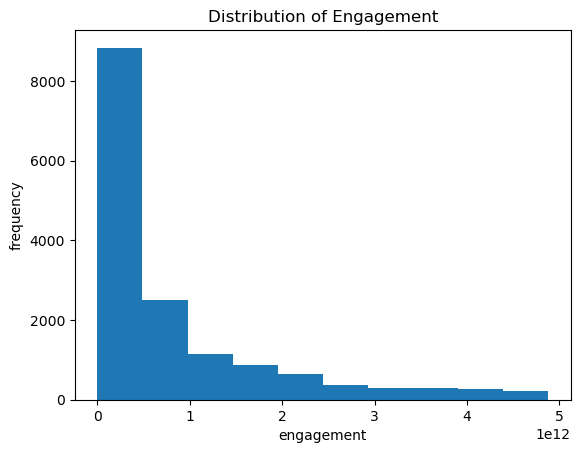

In [19]:
plt.hist(df['engagement'], bins=10)
plt.xlabel('engagement')
plt.ylabel('frequency')
plt.title('Distribution of Engagement')
plt.show()

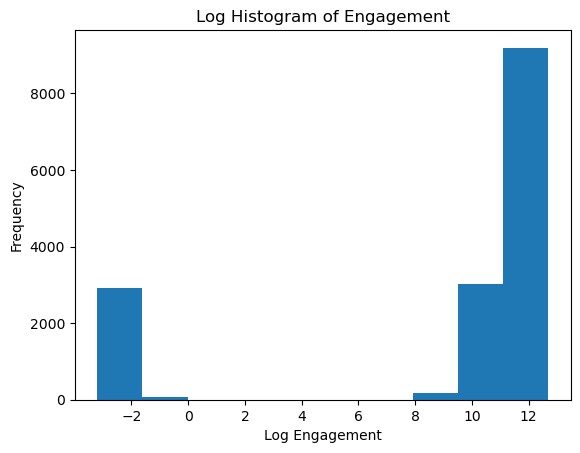

In [20]:
# Filter out zero and negative values from the 'Engagement' variable
engagement_filtered = df['engagement'][df['engagement'] > 0]

# Create a log-transformed array of the filtered 'Engagement' values
log_engagement = np.log10(engagement_filtered)

# Plot the log histogram
plt.hist(log_engagement, bins=10)
plt.xlabel('Log Engagement')
plt.ylabel('Frequency')
plt.title('Log Histogram of Engagement')
plt.show()

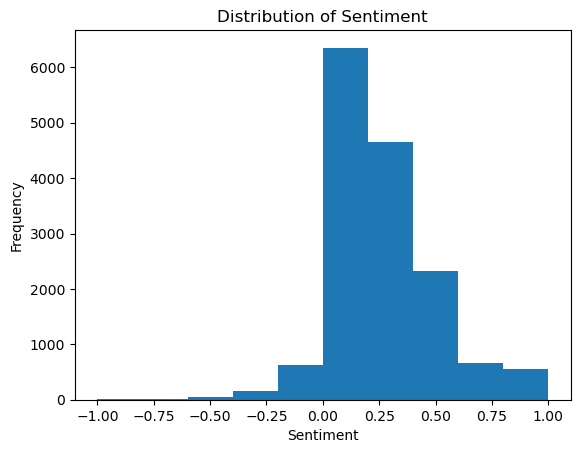

In [21]:
plt.hist(df['sentiment'], bins=10)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.show()

In [22]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for sentiment with neutral scores
neutral_engagement = df[df['sentiment'] == 0]['engagement']

# Filter the DataFrame for sentiment with positive scores
positive_engagement = df[df['sentiment'] > 0]['engagement']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(neutral_engagement, positive_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 18824796.5
P-value: 1.5100589881882836e-07


In [23]:
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Calculate the Common Language Effect Size
cles = cles_ind(neutral_engagement, positive_engagement)

print("Common Language Effect Size:", cles)

Common Language Effect Size: 0.47081531010692623


In [24]:
df['sentiment'] = df['sentiment'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

In [25]:
df[['message', 'sentiment']]

,message,sentiment
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,positive
1,See you next year! 😉 Don’t miss...,positive
2,Don't miss our HUGE firework display ! 🥳\n\n#f...,positive
3,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,neutral
4,It's the last day of our New Year's Sale! Save...,positive
...,...,...
15438,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,positive
15439,O Grupo Playcenter e os Parques Playcenter Fam...,neutral
15440,Gelukkig 2023! Laat de magie dit jaar stralen ...,neutral
15441,What are your 2023 New Years resolutions? ✨\n\...,positive


## **Exporting the dataframe for further analysis**
To work on our multilevel analysis, we will now create a new csv version of the dataframe, which includes the two features that have been created in this notebook (has_emoji, emoji_type).

In [26]:
import os

# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of the folder within the repository
folder_name = '02_new dataframes'

# Construct the full path to the folder within the repository
folder_path = os.path.join(notebook_directory, folder_name)

# Define the file path for the CSV file within the folder
csv_file_path = os.path.join(folder_path, 'H3_dataframe.csv')

# Save the updated DataFrame to a CSV file in the specified folder
df.to_csv(csv_file_path, index=False)